X_mean: [365.     11.3     4.225  16.775]
X_std: [134.48977656   4.34568752   1.99671605   6.31956288]
Optimal theta (normal equation): [ 3.37475000e+04  1.09730590e+04  2.98097591e+01 -3.13737424e+02
 -1.70077576e+02]


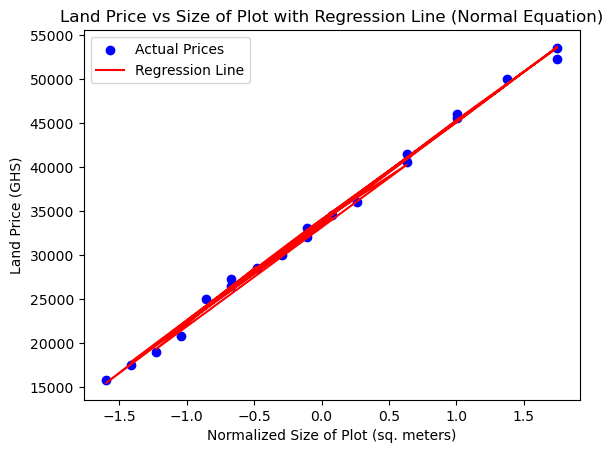

Predicted land price (normal equation): 45353.808630339365


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('full data.csv')  # place the path of the data

# Remove commas from 'Land Price (GHS)' and convert it to float
data['Land Price (GHS)'] = data['Land Price (GHS)'].replace({',': ''}, regex=True).astype(float)

# Separate features (Size, Distance) and target (Price)
X = data[['Size of Plot (sq. meters)', 'Distance from Airport (km)', 'Proximity to Main Road (km)', 'Proximity to City Center (km)']].values
y = data['Land Price (GHS)'].values

# Normalize the features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std
print(f"X_mean: {X_mean}")
print(f"X_std: {X_std}")

# Add a column of 1's for the bias term (theta_0)
m = len(y)  # number of training examples
X_b = np.c_[np.ones((m, 1)), X_norm]  # Add bias term (intercept)

# Compute theta using the normal equation
theta_normal = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the optimal theta values
print(f"Optimal theta (normal equation): {theta_normal}")

# Predict using the normal equation theta
predictions_normal = X_b.dot(theta_normal)

# Plot the dataset
plt.scatter(X_norm[:, 0], y, color='blue', label="Actual Prices")  # Using normalized 'Size of Plot'

# Plot the regression line
predicted_prices = X_b.dot(theta_normal)
plt.plot(X_norm[:, 0], predicted_prices, color='red', label="Regression Line")

# Adding labels and title
plt.xlabel("Normalized Size of Plot (sq. meters)")
plt.ylabel("Land Price (GHS)")
plt.title("Land Price vs Size of Plot with Regression Line (Normal Equation)")
plt.legend()
plt.show()

# New data prediction
new_data = np.array([[500, 20, 2, 10]])  # Example size and distances
new_data_norm = (new_data - X_mean) / X_std
new_data_b = np.c_[np.ones((1, 1)), new_data_norm]  # Add bias term
predicted_price = new_data_b.dot(theta_normal)
print(f"Predicted land price (normal equation): {predicted_price[0]}")
